<a href="https://colab.research.google.com/github/Jose-Bruno/VisualizacaoComputacional/blob/main/Jos%C3%A9_Bruno_da_Silva_Santos_Visualiza%C3%A7%C3%A3o_Computacional.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

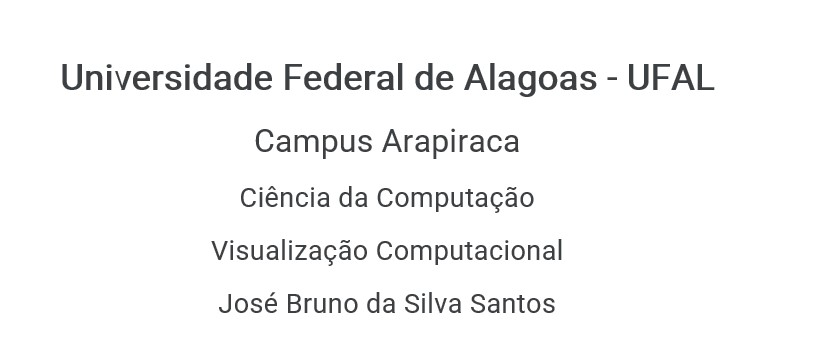

# **Projeto da Disciplina - Painel Covid-19 em Alagoas.**

**Os dados utilizados são referentes a atualização feita no dia 16/02/2022**

In [598]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [599]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px

In [600]:
dados = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Dados/dadosabertos (3).csv', encoding='latin-1', sep=';')

In [601]:
dados = dados.rename(columns={'CLASSIFICAÇÃO (Confirmado, suspeito, descartado, óbito, curado)': 'CLASSIFICAÇÃO'})
dados = dados.rename(columns={'Situação do paciente confirmado (UTI, isolamento domiciliar, enfermaria) ?': 'Situação do paciente confirmado'})
dados = dados.rename(columns={'Data do Óbito (Caso haja)': 'Data do Óbito'})

In [602]:
dados.head(25)

,Unnamed: 0,Data de atendimento no Serviço,IDADE,SEXO,MUNICÍPIO DE RESIDÊNCIA,CLASSIFICAÇÃO,Comorbidades,Situação do paciente confirmado,Data do Óbito,Data de Confirmação do Exame
0,0,26/03/2020,1,F,MACEIÓ,CONFIRMADO,SEM COMORBIDADE,RECUPERADO,NaN,13/04/2020
1,1,23/03/2020,38,M,MACEIÓ,CONFIRMADO,DOENÇA PULMONAR CRÔNICA,RECUPERADO,NaN,14/04/2020
2,2,06/04/2020,35,M,MACEIÓ,CONFIRMADO,NaN,RECUPERADO,NaN,14/04/2020
3,3,11/04/2020,57,M,MACEIÓ,CONFIRMADO,NaN,RECUPERADO,NaN,14/04/2020
4,4,27/04/2020,60,M,MACEIÓ,CONFIRMADO,NaN,RECUPERADO,NaN,14/04/2020
5,5,04/03/2020,42,M,MACEIÓ,CONFIRMADO,NaN,RECUPERADO,NaN,08/03/2020
6,6,14/03/2020,21,M,MACEIÓ,CONFIRMADO,NaN,RECUPERADO,NaN,18/03/2020
7,7,14/03/2020,25,F,MACEIÓ,CONFIRMADO,NaN,RECUPERADO,NaN,18/03/2020
8,8,14/03/2020,44,F,MACEIÓ,CONFIRMADO,HAS,RECUPERADO,NaN,18/03/2020
9,9,16/03/2020,38,M,MACEIÓ,CONFIRMADO,ASMA,RECUPERADO,NaN,19/03/2020


**Normalizando Dados**

In [603]:
dados["MUNICÍPIO DE RESIDÊNCIA"] = dados["MUNICÍPIO DE RESIDÊNCIA"].str.upper()
dados["Situação do paciente confirmado"] = dados["Situação do paciente confirmado"].str.upper()
dados['Comorbidades'] = dados['Comorbidades'].str.upper()

# Painel Geral

In [604]:
confirmados =  len(dados[(dados['CLASSIFICAÇÃO'] == 'CONFIRMADO')])
descartados = 470284  #valor referente a 16/02/2022
testados = confirmados + descartados

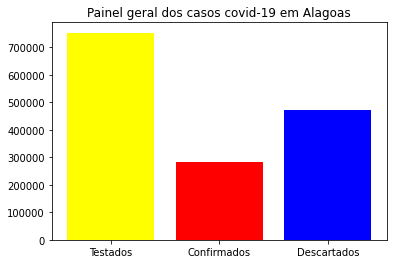

In [605]:
valores = [testados, confirmados, descartados]
legendas = ["Testados", "Confirmados", "Descartados"]

plt.bar(legendas, valores, color=['yellow', 'red', 'blue'])
plt.title('Painel geral dos casos covid-19 em Alagoas')
plt.show()

In [606]:
lista1 = [testados, confirmados, descartados]
legenda1 = ["Testados", "Confirmados", "Descartados"]
painel_geral = pd.DataFrame(list(zip(legenda1, lista1)), columns = ['Casos','Nº de Casos'])
painel_geral.head()

,Casos,Nº de Casos
0,Testados,753031
1,Confirmados,282747
2,Descartados,470284




> **População Privada de Liberdade**



In [607]:
# Valores referentes a 16/02/2022
testados = 512
descartados = 413
confirmados = 99

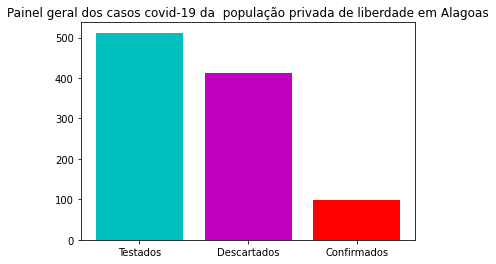

In [608]:
plt.bar(['Testados', 'Descartados','Confirmados'], [testados, descartados, confirmados], color=['c', 'm', 'r'])
plt.title('Painel geral dos casos covid-19 da  população privada de liberdade em Alagoas')
plt.show()

# Situação do Paciente

In [609]:
recuperado =  len(dados[(dados['Situação do paciente confirmado'] == 'RECUPERADO')])
obito = len(dados[(dados['Situação do paciente confirmado'] == 'ÓBITO') | (dados['Situação do paciente confirmado'] == 'óbITO')])
hospitalizado = len(dados[(dados['Situação do paciente confirmado'] == 'HOSPITALIZADO') | (dados['Situação do paciente confirmado'] == 'Hospitalizado')])
isolamento = len(dados[(dados['Situação do paciente confirmado'] == 'ISOLAMENTO DOMICILIAR')])
obito_outros = len(dados[(dados['Situação do paciente confirmado'] == 'ÓBITO POR OUTRAS CAUSAS')])

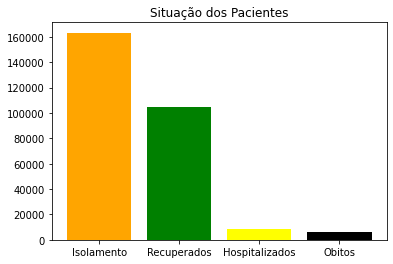

In [610]:
situação = ["Isolamento", "Recuperados", "Hospitalizados", "Obitos"]
valores = [isolamento, recuperado, hospitalizado, obito]

plt.bar(situação, valores, color=['orange', 'green', 'yellow', 'black'])
plt.title('Situação dos Pacientes')
plt.show()

In [611]:
lista2 = [obito_outros, obito, hospitalizado, recuperado, isolamento]
legenda2 = ["Obítos por Outras Causas", "Obitos", "Hospitalizados", "Recuperados", "Isolamento"]
situacao = pd.DataFrame(list(zip(legenda2, lista2)), columns = ['Situação dos Pacientes','Nº de Casos '])
situacao.head()

,Situação dos Pacientes,Nº de Casos
0,Obítos por Outras Causas,31
1,Obitos,6544
2,Hospitalizados,8439
3,Recuperados,104459
4,Isolamento,163274


# Casos Confirmados por Sexo

In [612]:
casos_confirmados_homens = len(dados[(dados['SEXO'] == 'M') & (dados['CLASSIFICAÇÃO'] == 'CONFIRMADO')])
casos_confirmados_mulheres = len(dados[(dados['SEXO'] == 'F') & (dados['CLASSIFICAÇÃO'] == 'CONFIRMADO')])

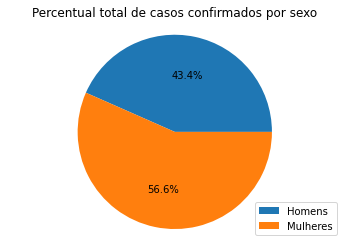

In [613]:
valores = [casos_confirmados_homens, casos_confirmados_mulheres]
legenda = ["Homens", "Mulheres"]

plt.pie(valores, autopct='%1.1f%%')
plt.legend(legenda, loc=4)
plt.axis('equal')
plt.title('Percentual total de casos confirmados por sexo')
plt.show()

In [614]:
lista3 = [casos_confirmados_homens, casos_confirmados_mulheres]
legenda3 = ["Homens", "Mulheres"]
casos_confirmados = pd.DataFrame(list(zip(legenda3, lista3)), columns = ['Sexo','Nº de Casos Confirmados por Sexo'])
casos_confirmados.head()

,Sexo,Nº de Casos Confirmados por Sexo
0,Homens,122493
1,Mulheres,159801


## **Números de Casos Confirmados por Mês**

In [615]:
confirm = dados.loc[dados['CLASSIFICAÇÃO'] == 'CONFIRMADO', 'Data de Confirmação do Exame']

data_confirm = pd.DataFrame(list(zip(confirm)), columns = ['Data de Confirmação'])


In [616]:
data_confirm['Data de Confirmação'] = pd.to_datetime(data_confirm['Data de Confirmação']) #Transformando em data time

# 2020

marco_2020 = len(data_confirm[data_confirm["Data de Confirmação"].isin(pd.date_range('2020-03-1', '2020-03-31'))])
abril_2020 = len(data_confirm[data_confirm["Data de Confirmação"].isin(pd.date_range('2020-04-1', '2020-04-30'))])
maio_2020 = len(data_confirm[data_confirm["Data de Confirmação"].isin(pd.date_range('2020-05-1', '2020-05-31'))])
junho_2020 = len(data_confirm[data_confirm["Data de Confirmação"].isin(pd.date_range('2020-06-1', '2020-06-30'))])
julho_2020 = len(data_confirm[data_confirm["Data de Confirmação"].isin(pd.date_range('2020-07-1', '2020-07-31'))])
agosto_2020 = len(data_confirm[data_confirm["Data de Confirmação"].isin(pd.date_range('2020-08-1', '2020-08-31'))])
setembro_2020 = len(data_confirm[data_confirm["Data de Confirmação"].isin(pd.date_range('2020-09-1', '2020-09-30'))])
outubro_2020 = len(data_confirm[data_confirm["Data de Confirmação"].isin(pd.date_range('2020-10-1', '2020-10-31'))])
marco_2020 = len(data_confirm[data_confirm["Data de Confirmação"].isin(pd.date_range('2020-03-1', '2020-03-31'))])
abril_2020 = len(data_confirm[data_confirm["Data de Confirmação"].isin(pd.date_range('2020-04-1', '2020-04-30'))])
maio_2020 = len(data_confirm[data_confirm["Data de Confirmação"].isin(pd.date_range('2020-05-1', '2020-05-31'))])
junho_2020 = len(data_confirm[data_confirm["Data de Confirmação"].isin(pd.date_range('2020-06-1', '2020-06-30'))])
julho_2020 = len(data_confirm[data_confirm["Data de Confirmação"].isin(pd.date_range('2020-07-1', '2020-07-31'))])
agosto_2020 = len(data_confirm[data_confirm["Data de Confirmação"].isin(pd.date_range('2020-08-1', '2020-08-31'))])
setembro_2020 = len(data_confirm[data_confirm["Data de Confirmação"].isin(pd.date_range('2020-09-1', '2020-09-30'))])
outubro_2020 = len(data_confirm[data_confirm["Data de Confirmação"].isin(pd.date_range('2020-10-1', '2020-10-31'))])
novembro_2020 = len(data_confirm[data_confirm["Data de Confirmação"].isin(pd.date_range('2020-11-1', '2020-11-30'))])
dezembro_2020 = len(data_confirm[data_confirm["Data de Confirmação"].isin(pd.date_range('2020-12-1', '2020-12-31'))])

#2021

janeiro_2021 = len(data_confirm[data_confirm["Data de Confirmação"].isin(pd.date_range('2021-01-1', '2021-01-31'))])
fevereiro_2021 = len(data_confirm[data_confirm["Data de Confirmação"].isin(pd.date_range('2021-02-1', '2021-02-28'))])
marco_2021 = len(data_confirm[data_confirm["Data de Confirmação"].isin(pd.date_range('2021-03-1', '2021-03-31'))])
abril_2021 = len(data_confirm[data_confirm["Data de Confirmação"].isin(pd.date_range('2021-04-1', '2021-04-30'))])
maio_2021 = len(data_confirm[data_confirm["Data de Confirmação"].isin(pd.date_range('2021-05-1', '2021-05-31'))])
junho_2021 = len(data_confirm[data_confirm["Data de Confirmação"].isin(pd.date_range('2021-06-1', '2021-06-30'))])
julho_2021 = len(data_confirm[data_confirm["Data de Confirmação"].isin(pd.date_range('2021-07-1', '2021-07-31'))])
agosto_2021 = len(data_confirm[data_confirm["Data de Confirmação"].isin(pd.date_range('2021-08-1', '2021-08-31'))])
setembro_2021 = len(data_confirm[data_confirm["Data de Confirmação"].isin(pd.date_range('2021-09-1', '2021-09-30'))])
outubro_2021 = len(data_confirm[data_confirm["Data de Confirmação"].isin(pd.date_range('2021-10-1', '2021-10-31'))])
marco_2021 = len(data_confirm[data_confirm["Data de Confirmação"].isin(pd.date_range('2021-03-1', '2021-03-31'))])
abril_2021 = len(data_confirm[data_confirm["Data de Confirmação"].isin(pd.date_range('2021-04-1', '2021-04-30'))])
maio_2021 = len(data_confirm[data_confirm["Data de Confirmação"].isin(pd.date_range('2021-05-1', '2021-05-31'))])
junho_2021 = len(data_confirm[data_confirm["Data de Confirmação"].isin(pd.date_range('2021-06-1', '2021-06-30'))])
julho_2021 = len(data_confirm[data_confirm["Data de Confirmação"].isin(pd.date_range('2021-07-1', '2021-07-31'))])
agosto_2021 = len(data_confirm[data_confirm["Data de Confirmação"].isin(pd.date_range('2021-08-1', '2021-08-31'))])
setembro_2021 = len(data_confirm[data_confirm["Data de Confirmação"].isin(pd.date_range('2021-09-1', '2021-09-30'))])
outubro_2021 = len(data_confirm[data_confirm["Data de Confirmação"].isin(pd.date_range('2021-10-1', '2021-10-31'))])
novembro_2021 = len(data_confirm[data_confirm["Data de Confirmação"].isin(pd.date_range('2021-11-1', '2021-11-30'))])
dezembro_2021 = len(data_confirm[data_confirm["Data de Confirmação"].isin(pd.date_range('2021-12-1', '2021-12-31'))])

#2022

janeiro_2022 = len(data_confirm[data_confirm["Data de Confirmação"].isin(pd.date_range('2022-01-1', '2022-01-31'))])
fevereiro_2022 = len(data_confirm[data_confirm["Data de Confirmação"].isin(pd.date_range('2022-02-1', '2022-02-16'))])

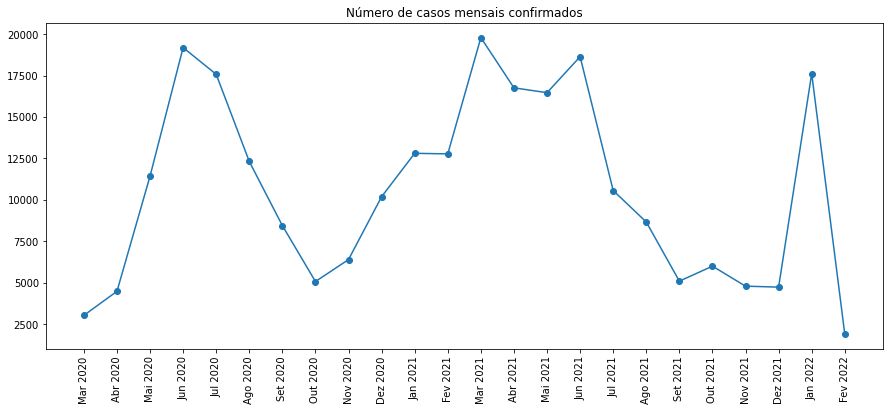

In [617]:
eixo_x = ['Mar 2020', 'Abr 2020', 'Mai 2020', 'Jun 2020', 'Jul 2020', 'Ago 2020', 'Set 2020', 'Out 2020', 'Nov 2020', 'Dez 2020',
          'Jan 2021', 'Fev 2021', 'Mar 2021', 'Abr 2021', 'Mai 2021', 'Jun 2021', 'Jul 2021', 'Ago 2021', 'Set 2021', 'Out 2021', 'Nov 2021', 'Dez 2021',
          'Jan 2022', 'Fev 2022']

eixo_y =[marco_2020, abril_2020, maio_2020, junho_2020, julho_2020, agosto_2020, setembro_2020, outubro_2020, novembro_2020, dezembro_2020,
         janeiro_2021, fevereiro_2021, marco_2021, abril_2021, maio_2021, junho_2021, julho_2021, agosto_2021, setembro_2021, outubro_2021, novembro_2021, dezembro_2021,
         janeiro_2022, fevereiro_2022]

plt.figure(figsize=(15,6)) 
plt.plot(eixo_x, eixo_y, marker='o')
plt.tick_params(axis='x', labelrotation = 90) 
plt.title('Número de casos mensais confirmados')  
plt.show() 

# Obitos

In [618]:
casos_obitos_homens = len(dados[(dados['SEXO'] == 'M') & (dados['Situação do paciente confirmado'] == 'ÓBITO')])
casos_obitos_Mulheres = len(dados[(dados['SEXO'] == 'F') & (dados['Situação do paciente confirmado'] == 'ÓBITO')])

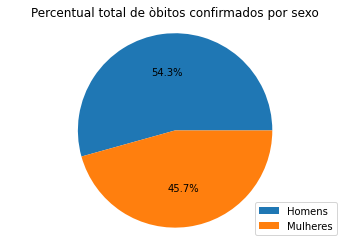

In [619]:
valores = [casos_obitos_homens, casos_obitos_Mulheres]
legenda = ["Homens", "Mulheres"]

plt.pie(valores, autopct='%1.1f%%')
plt.legend(legenda, loc=4)
plt.axis('equal')
plt.title('Percentual total de òbitos confirmados por sexo')
plt.show()

In [620]:
lista4 = [casos_obitos_homens, casos_obitos_Mulheres]
legenda4 = ["Homens", "Mulheres"]
obitos = pd.DataFrame(list(zip(legenda4, lista4)), columns = ['Sexo','Nº de Mortes por Sexo'])
obitos.head()

,Sexo,Nº de Mortes por Sexo
0,Homens,3553
1,Mulheres,2987


## **Número de Obtitos por mês**

In [621]:
confirmacao_obitos = dados.loc[dados['Situação do paciente confirmado'] == 'ÓBITO', 'Data do Óbito']

data_obitos = pd.DataFrame(confirmacao_obitos, columns = ['Data do Óbito'])


In [622]:
data_obitos['Data do Óbito'] = pd.to_datetime(data_obitos['Data do Óbito']) #Transformando em data time 

# 2020

marco_2020 = len(data_obitos[data_obitos["Data do Óbito"].isin(pd.date_range('2020-03-1', '2020-03-31'))])
abril_2020 = len(data_obitos[data_obitos["Data do Óbito"].isin(pd.date_range('2020-04-1', '2020-04-30'))])
maio_2020 = len(data_obitos[data_obitos["Data do Óbito"].isin(pd.date_range('2020-05-1', '2020-05-31'))])
junho_2020 = len(data_obitos[data_obitos["Data do Óbito"].isin(pd.date_range('2020-06-1', '2020-06-30'))])
julho_2020 = len(data_obitos[data_obitos["Data do Óbito"].isin(pd.date_range('2020-07-1', '2020-07-31'))])
agosto_2020 = len(data_obitos[data_obitos["Data do Óbito"].isin(pd.date_range('2020-08-1', '2020-08-31'))])
setembro_2020 = len(data_obitos[data_obitos["Data do Óbito"].isin(pd.date_range('2020-09-1', '2020-09-30'))])
outubro_2020 = len(data_obitos[data_obitos["Data do Óbito"].isin(pd.date_range('2020-10-1', '2020-10-31'))])
marco_2020 = len(data_obitos[data_obitos["Data do Óbito"].isin(pd.date_range('2020-03-1', '2020-03-31'))])
abril_2020 = len(data_obitos[data_obitos["Data do Óbito"].isin(pd.date_range('2020-04-1', '2020-04-30'))])
maio_2020 = len(data_obitos[data_obitos["Data do Óbito"].isin(pd.date_range('2020-05-1', '2020-05-31'))])
junho_2020 = len(data_obitos[data_obitos["Data do Óbito"].isin(pd.date_range('2020-06-1', '2020-06-30'))])
julho_2020 = len(data_obitos[data_obitos["Data do Óbito"].isin(pd.date_range('2020-07-1', '2020-07-31'))])
agosto_2020 = len(data_obitos[data_obitos["Data do Óbito"].isin(pd.date_range('2020-08-1', '2020-08-31'))])
setembro_2020 = len(data_obitos[data_obitos["Data do Óbito"].isin(pd.date_range('2020-09-1', '2020-09-30'))])
outubro_2020 = len(data_obitos[data_obitos["Data do Óbito"].isin(pd.date_range('2020-10-1', '2020-10-31'))])
novembro_2020 = len(data_obitos[data_obitos["Data do Óbito"].isin(pd.date_range('2020-11-1', '2020-11-30'))])
dezembro_2020 = len(data_obitos[data_obitos["Data do Óbito"].isin(pd.date_range('2020-12-1', '2020-12-31'))])

#2021

janeiro_2021 = len(data_obitos[data_obitos["Data do Óbito"].isin(pd.date_range('2021-01-1', '2021-01-31'))])
fevereiro_2021 = len(data_obitos[data_obitos["Data do Óbito"].isin(pd.date_range('2021-02-1', '2021-02-28'))])
marco_2021 = len(data_obitos[data_obitos["Data do Óbito"].isin(pd.date_range('2021-03-1', '2021-03-31'))])
abril_2021 = len(data_obitos[data_obitos["Data do Óbito"].isin(pd.date_range('2021-04-1', '2021-04-30'))])
maio_2021 = len(data_obitos[data_obitos["Data do Óbito"].isin(pd.date_range('2021-05-1', '2021-05-31'))])
junho_2021 = len(data_obitos[data_obitos["Data do Óbito"].isin(pd.date_range('2021-06-1', '2021-06-30'))])
julho_2021 = len(data_obitos[data_obitos["Data do Óbito"].isin(pd.date_range('2021-07-1', '2021-07-31'))])
agosto_2021 = len(data_obitos[data_obitos["Data do Óbito"].isin(pd.date_range('2021-08-1', '2021-08-31'))])
setembro_2021 = len(data_obitos[data_obitos["Data do Óbito"].isin(pd.date_range('2021-09-1', '2021-09-30'))])
outubro_2021 = len(data_obitos[data_obitos["Data do Óbito"].isin(pd.date_range('2021-10-1', '2021-10-31'))])
marco_2021 = len(data_obitos[data_obitos["Data do Óbito"].isin(pd.date_range('2021-03-1', '2021-03-31'))])
abril_2021 = len(data_obitos[data_obitos["Data do Óbito"].isin(pd.date_range('2021-04-1', '2021-04-30'))])
maio_2021 = len(data_obitos[data_obitos["Data do Óbito"].isin(pd.date_range('2021-05-1', '2021-05-31'))])
junho_2021 = len(data_obitos[data_obitos["Data do Óbito"].isin(pd.date_range('2021-06-1', '2021-06-30'))])
julho_2021 = len(data_obitos[data_obitos["Data do Óbito"].isin(pd.date_range('2021-07-1', '2021-07-31'))])
agosto_2021 = len(data_obitos[data_obitos["Data do Óbito"].isin(pd.date_range('2021-08-1', '2021-08-31'))])
setembro_2021 = len(data_obitos[data_obitos["Data do Óbito"].isin(pd.date_range('2021-09-1', '2021-09-30'))])
outubro_2021 = len(data_obitos[data_obitos["Data do Óbito"].isin(pd.date_range('2021-10-1', '2021-10-31'))])
novembro_2021 = len(data_obitos[data_obitos["Data do Óbito"].isin(pd.date_range('2021-11-1', '2021-11-30'))])
dezembro_2021 = len(data_obitos[data_obitos["Data do Óbito"].isin(pd.date_range('2021-12-1', '2021-12-31'))])

#2022

janeiro_2022 = len(data_obitos[data_obitos["Data do Óbito"].isin(pd.date_range('2022-01-1', '2022-01-31'))])
fevereiro_2022 = len(data_obitos[data_obitos["Data do Óbito"].isin(pd.date_range('2022-02-1', '2022-02-16'))])

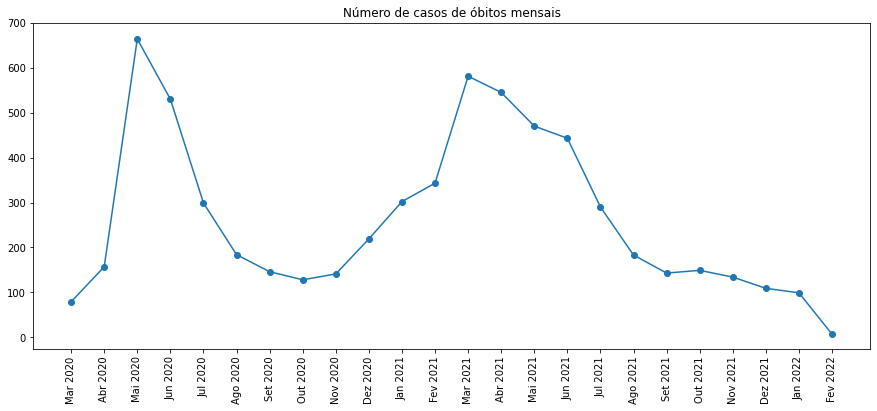

In [623]:
eixo_x = ['Mar 2020', 'Abr 2020', 'Mai 2020', 'Jun 2020', 'Jul 2020', 'Ago 2020', 'Set 2020', 'Out 2020', 'Nov 2020', 'Dez 2020',
          'Jan 2021', 'Fev 2021', 'Mar 2021', 'Abr 2021', 'Mai 2021', 'Jun 2021', 'Jul 2021', 'Ago 2021', 'Set 2021', 'Out 2021', 'Nov 2021', 'Dez 2021',
          'Jan 2022', 'Fev 2022']

eixo_y = [marco_2020, abril_2020, maio_2020, junho_2020, julho_2020, agosto_2020, setembro_2020, outubro_2020, novembro_2020, dezembro_2020,
         janeiro_2021, fevereiro_2021, marco_2021, abril_2021, maio_2021, junho_2021, julho_2021, agosto_2021, setembro_2021, outubro_2021, novembro_2021, dezembro_2021,
         janeiro_2022, fevereiro_2022]

plt.figure(figsize=(15,6)) 
plt.plot(eixo_x, eixo_y, marker='o')
plt.yticks([0,100, 200, 300, 400, 500, 600, 700])
plt.tick_params(axis='x', labelrotation = 90) 
plt.title('Número de casos de óbitos mensais')  
plt.show() 

# **Situação de Casos Confirmados por Municipio**

In [624]:
municipios_df = dados['MUNICÍPIO DE RESIDÊNCIA']
municipios = []
n_obitos = []
n_hospitalizados = []
n_recuperados = []
n_isolamento = []
c_confirmados = []

for x in municipios_df:
  if x not in municipios:
    municipios.append(x)

    nr = len(dados[(dados['MUNICÍPIO DE RESIDÊNCIA'] == x) & (dados['Situação do paciente confirmado'] == 'RECUPERADO')])
    n_recuperados.append(nr)

    no = len(dados[(dados['MUNICÍPIO DE RESIDÊNCIA'] == x) & (dados['Situação do paciente confirmado'] == 'ÓBITO')])
    n_obitos.append(no)
    
    nh = len(dados[(dados['MUNICÍPIO DE RESIDÊNCIA'] == x) & (dados['Situação do paciente confirmado'] == 'HOSPITALIZADO')])
    n_hospitalizados.append(nh)

    ni = len(dados[(dados['MUNICÍPIO DE RESIDÊNCIA'] == x) & (dados['Situação do paciente confirmado'] == 'ISOLAMENTO DOMICILIAR')])
    n_isolamento.append(ni)

    cc = len(dados[(dados['MUNICÍPIO DE RESIDÊNCIA'] == x) & (dados['CLASSIFICAÇÃO'] == 'CONFIRMADO')])
    c_confirmados.append(cc)


In [625]:
situacao = pd.DataFrame(municipios, columns = ['Municipios'])
situacao = situacao.assign(Casos_Confirmados  = c_confirmados)
situacao = situacao.assign(Isolamento = n_isolamento)
situacao = situacao.assign(Recuperados = n_recuperados)
situacao = situacao.assign(Hospitalizados = n_hospitalizados)
situacao = situacao.assign(Óbitos = n_obitos)
situacao.sort_values(by=['Casos_Confirmados'], ascending=False)

,Municipios,Casos_Confirmados,Isolamento,Recuperados,Hospitalizados,Óbitos
0,MACEIÓ,110407,57255,45855,4400,2886
9,ARAPIRACA,34843,22698,10876,725,542
3,MARECHAL DEODORO,8040,6250,1495,172,123
1,PALMEIRA DOS ÍNDIOS,5909,4300,1248,201,160
42,SANTANA DO IPANEMA,5763,4345,1199,111,107
...,...,...,...,...,...,...
86,BELÉM,200,151,33,8,8
95,JUNDIÁ,193,66,115,7,5
83,OLHO D'ÁGUA DO CASADO,188,129,49,4,6
84,FELIZ DESERTO,176,132,35,4,5


# **Casos por municipio de residência**



> **Maiores numero de casos**



In [626]:
maceio = len(dados[(dados['MUNICÍPIO DE RESIDÊNCIA'] == 'MACEIÓ') & (dados['CLASSIFICAÇÃO'] == 'CONFIRMADO')])
arapiraca = len(dados[(dados['MUNICÍPIO DE RESIDÊNCIA'] == 'ARAPIRACA') & (dados['CLASSIFICAÇÃO'] == 'CONFIRMADO')])
marechal = len(dados[(dados['MUNICÍPIO DE RESIDÊNCIA'] == 'MARECHAL DEODORO') & (dados['CLASSIFICAÇÃO'] == 'CONFIRMADO')])
palmeira = len(dados[(dados['MUNICÍPIO DE RESIDÊNCIA'] == 'PALMEIRA DOS ÍNDIOS') & (dados['CLASSIFICAÇÃO'] == 'CONFIRMADO')])
santana = len(dados[(dados['MUNICÍPIO DE RESIDÊNCIA'] == 'SANTANA DO IPANEMA') & (dados['CLASSIFICAÇÃO'] == 'CONFIRMADO')])

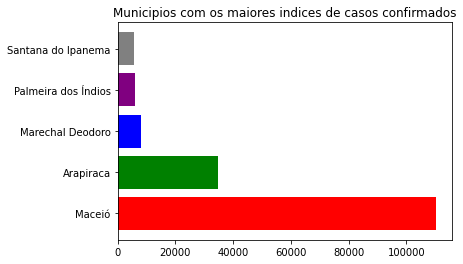

In [627]:
municipios = [maceio, arapiraca, marechal, palmeira, santana]
legendas = ['Maceió', 'Arapiraca', 'Marechal Deodoro', 'Palmeira dos Índios', "Santana do Ipanema"]

plt.barh(legendas, municipios, color=['red', 'green', 'blue', 'purple', 'gray'])
plt.title('Municipios com os maiores indices de casos confirmados')
plt.show()



> **Menores numeros de casos**



In [628]:
belem = len(dados[(dados['MUNICÍPIO DE RESIDÊNCIA'] == 'BELÉM') & (dados['CLASSIFICAÇÃO'] == 'CONFIRMADO')])
jundia = len(dados[(dados['MUNICÍPIO DE RESIDÊNCIA'] == 'JUNDIÁ') & (dados['CLASSIFICAÇÃO'] == 'CONFIRMADO')])
casado = len(dados[(dados['MUNICÍPIO DE RESIDÊNCIA'] == "OLHO D'ÁGUA DO CASADO") & (dados['CLASSIFICAÇÃO'] == 'CONFIRMADO')])
feliz_deserto = len(dados[(dados['MUNICÍPIO DE RESIDÊNCIA'] == 'FELIZ DESERTO') & (dados['CLASSIFICAÇÃO'] == 'CONFIRMADO')])
mar_vermelho = len(dados[(dados['MUNICÍPIO DE RESIDÊNCIA'] == 'MAR VERMELHO') & (dados['CLASSIFICAÇÃO'] == 'CONFIRMADO')])

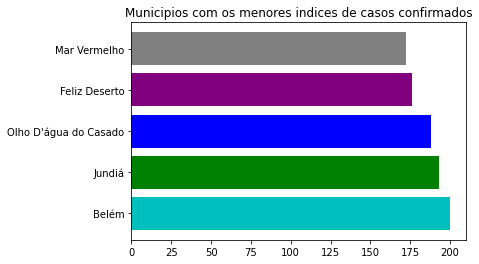

In [629]:
municipios = [belem, jundia, casado, feliz_deserto, mar_vermelho]
legendas = ['Belém', 'Jundiá', "Olho D'água do Casado", 'Feliz Deserto', "Mar Vermelho"]

plt.barh(legendas, municipios, color=['c', 'green', 'blue', 'purple', 'gray'])
plt.title('Municipios com os menores indices de casos confirmados')
plt.show()

# **Comorbidades**

In [630]:
comorbidades_geral = len(dados[(dados["Comorbidades"]!= "NaN") & (dados['Comorbidades'] != 'SEM COMORBIDADE') & (dados['Comorbidades'] != 'nan') & (dados['Comorbidades'] != 'SEM COMORBIDADES')])
sem_comorbidades = len(dados[(dados["Comorbidades"] == "NaN") | (dados['Comorbidades'] == 'SEM COMORBIDADE') | (dados['Comorbidades'] == 'nan') | (dados['Comorbidades'] == 'SEM COMORBIDADES')])
print("Numero de pacientes confirmados que possuem comorbidades: {}".format(comorbidades_geral))
print("Numero de pacientes confirmados que não possuem comorbidades: {}".format(sem_comorbidades))

Numero de pacientes confirmados que possuem comorbidades: 280780
Numero de pacientes confirmados que não possuem comorbidades: 1967
